# EDA for covid-chestxray-dataset

여기서 진행한 EDA (Exploratory Data Analysis)는 COVIDx-CXR dataset을 생성하는 [create_COVIDx.ipynb](https://github.com/lindawangg/COVID-Net/blob/master/create_COVIDx.ipynb)의 내용을 기반으로 작성되었다. COVIDx-CXR dataset에서는 covid-chestxray-dataset의 COVID-19, Pneumonia image들만 활용했다.

In [1]:
import pandas as pd

## Load metadata.csv

In [2]:
meta_data_path = 'covid-chestxray-dataset/metadata.csv'
meta_data = pd.read_csv(meta_data_path)
meta_data.head(3)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN


## Attirubtes

| Attribute | Description |
|:------|:-----|
| patientid | Internal identifier |
| offset | Number of days since the start of symptoms or hospitalization for each image. If a report indicates "after a few days", then 5 days is assumed. This is very important to have when there are multiple images for the same patient to track progression. |
| sex | Male (M), Female (F), or blank |
| age | Age of the patient in years |
| finding | Type of pneumonia |
| RT_PCR_positive | Yes (Y) or no (N) or blank if not reported/taken |
| survival | Yes (Y) or no (N) or blank if unknown|
| intubated | Yes (Y) if the patient was intubated (or ventilated) at any point during this illness or No (N) or blank if unknown. |
| went_icu | Yes (Y) if the patient was in the ICU (intensive care unit) or CCU (critical care unit) at any point during this illness or No (N) or blank if unknown.|
| needed_supplemental_O2 | Yes (Y) if the patient required supplemental oxygen at any point during this illness or No (N) or blank if unknown |
| extubated | Yes (Y) if the patient was successfully extubated or No (N) or blank if unknown |
| temperature | Temperature of the patient in Celsius at the time of the image|
| pO2 saturation | partial pressure of oxygen saturation in % at the time of the image |
| wbc count | white blood cell count in units of 10^3/uL at the time of the image |
| neutrophil count | neutrophil cell count in units of 10^3/uL at the time of the image |
| lymphocyte count | lymphocyte cell count in units of 10^3/uL at the time of the image |
| view | Posteroanterior (PA), Anteroposterior (AP), AP Supine (APS), or Lateral (L) for X-rays; Axial or Coronal for CT scans. Translations: Bettaufnahme->Supine, Liegend->Supine|
| modality | CT, X-ray, or something else |
| date | Date on which the image was acquired |
| location | Hospital name, city, state, country |
| filename | Name with extension |
| doi | Digital object identifier ([DOI](https://en.wikipedia.org/wiki/Digital_object_identifier)) of the research article |
| url | URL of the paper or website where the image came from |
| license | License of the image such as CC BY-NC-SA. Blank if unknown |
| clinical notes | Clinical notes about the image and/or the patient |
| other notes | e.g. credit |

In [3]:
meta_data.dtypes

patientid                  object
offset                    float64
sex                        object
age                       float64
finding                    object
RT_PCR_positive            object
survival                   object
intubated                  object
intubation_present         object
went_icu                   object
in_icu                     object
needed_supplemental_O2     object
extubated                  object
temperature               float64
pO2_saturation            float64
leukocyte_count           float64
neutrophil_count          float64
lymphocyte_count          float64
view                       object
modality                   object
date                       object
location                   object
folder                     object
filename                   object
doi                        object
url                        object
license                    object
clinical_notes             object
other_notes                object
Unnamed: 29   

## Data distribution

### # images

In [81]:
num_of_img = len(meta_data)
num_of_covid = (meta_data['finding'].apply(func=lambda x: x.split('/')[-1])
                                    .value_counts()['COVID-19'])
num_of_pnuemonia = (meta_data['finding'].apply(func=lambda x: 'Pneumonia' if 'Pneumonia' in x else 'Non-P')
                                        .value_counts()['Pneumonia']) - num_of_covid
print(f'All: {num_of_img}, COVID-19: {num_of_covid}, Pneumonia: {num_of_pnuemonia}, Non-Pneumonia: {num_of_img - (num_of_covid + num_of_pnuemonia)}')

All: 950, COVID-19: 584, Pneumonia: 242, Non-Pneumonia: 124


### # images by patient ID

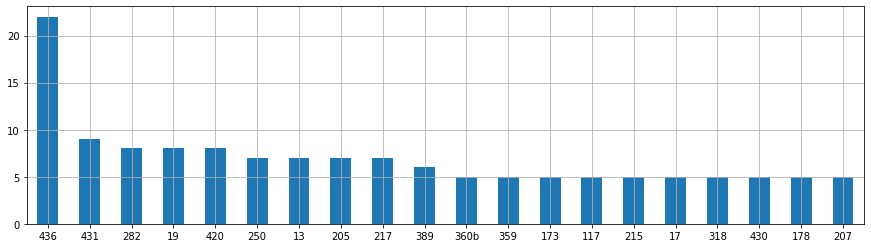

In [4]:
meta_data['patientid'].value_counts()[:20].plot.bar(figsize=(15, 4), rot=0, grid=True)

### Patient types

Patient의 질환에 대해 살펴보았다.

#### All types

covid-chestxray-dataset의 모든 질환 Class는 다음과 같다.

In [5]:
meta_data['finding'].unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

아래 그래프는 covid-chestxray-dataset의 모든 CXR image의 Class 분포를 나타낸 것인데, COVID-19 image가 가장 많고 Normal image는 없는 것 같다.

또한, todo라는 알 수 없는 Class도 존재한다.

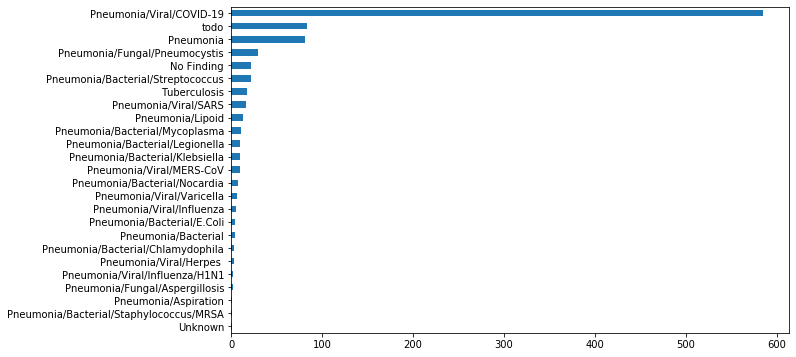

In [6]:
meta_data['finding'].value_counts(ascending=True).plot.barh(figsize=(10, 6))

COVIDx-CXR dataset에서는 전체 Pneumonia 중 Viral, Bacterial penumonia만 사용했고, 그 중에서도 특정 Type들만 사용했다.

나머지 Class들은 왜 사용되지 않았는지 그 이유는 알 수 없다 (아마 논문을 살펴봐야 할 듯).

#### Viral penumonia

COVIDx-CXR dataset에서는 Viral penumonia 중 SARS, MERS의 경우만 사용하려고 한 것 같은데, covid-chestxray-dataset에서 MERS의 실제값이 MERS가 아니라 MERS-CoV라서 필터링 할 때 유의해야 한다.

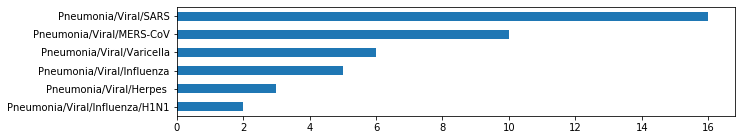

In [7]:
viral_pneumonia = meta_data[(meta_data['finding'].str.contains('Viral')) & \
                            ~(meta_data['finding'].str.contains('COVID-19'))]
viral_pneumonia['finding'].value_counts(ascending=True).plot.barh(figsize=(10, 2))

#### Bacterial penumonia

COVIDx-CXR dataset에서는 Bacterial penumonia 중 Streptococcus, Klebsiella, Legionella, Chlamydophila 경우만 사용하려고 한 것 같다.

하지만 Mycoplasma, Nocardia, E.Coli, 종류를 알 수 없는 Image, MRSA 경우는 왜 사용하지 않았는지 그 이유는 알 수 없다.

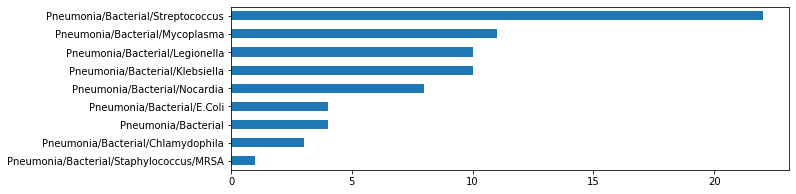

In [8]:
viral_pneumonia = meta_data[(meta_data['finding'].str.contains('Bacterial')) & \
                            ~(meta_data['finding'].str.contains('COVID-19'))]
viral_pneumonia['finding'].value_counts(ascending=True).plot.barh(figsize=(10, 3))

#### Others

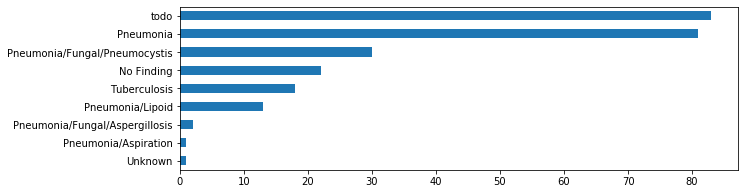

In [9]:
bacterial_pneumonia = meta_data[~(meta_data['finding'].str.contains('Viral')) & \
                                ~(meta_data['finding'].str.contains('Bacterial')) & \
                                ~(meta_data['finding'].str.contains('COVID-19'))]
bacterial_pneumonia['finding'].value_counts(ascending=True).plot.barh(figsize=(10, 3))

### Other columns

In [10]:
meta_data.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

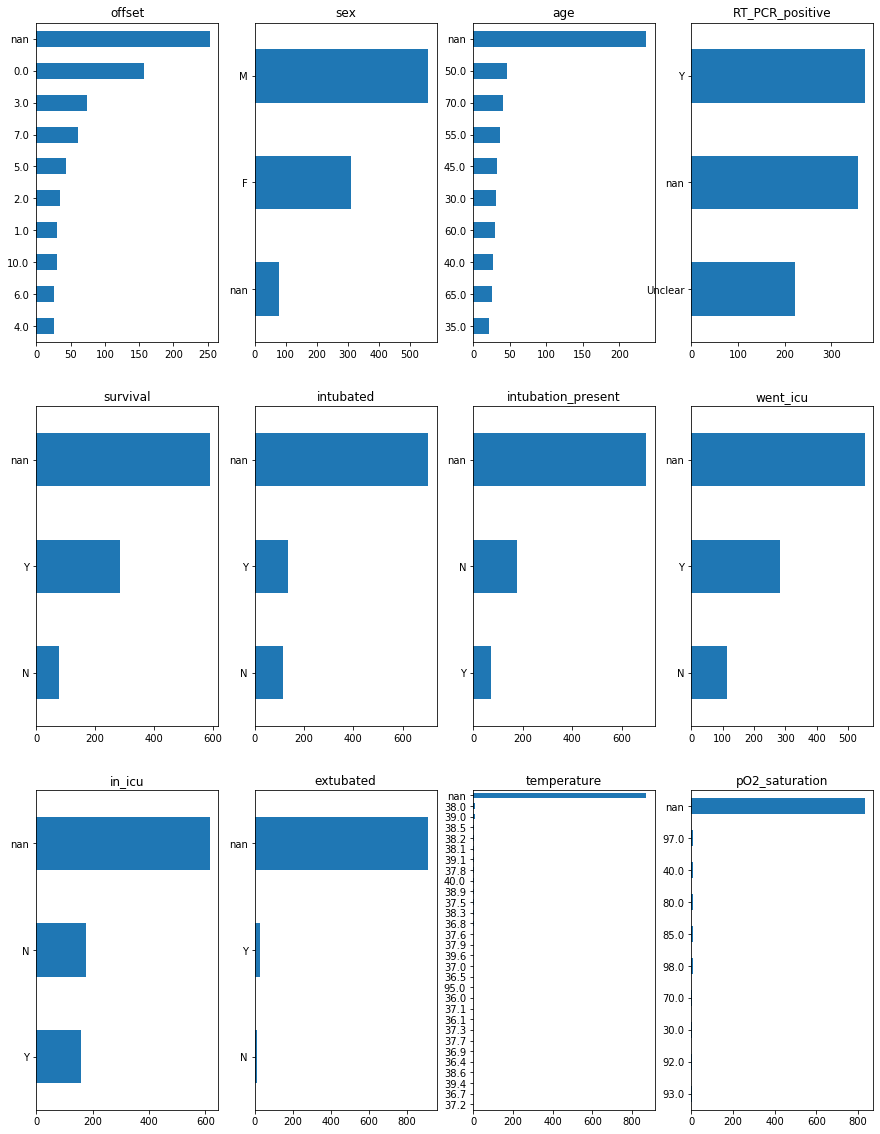

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 20))
meta_data['offset'].astype(str).value_counts(dropna=False, ascending=True)[-10:].plot.barh(title='offset', ax=axes[0,0])
meta_data['sex'].value_counts(dropna=False, ascending=True).plot.barh(title='sex', ax=axes[0,1])
meta_data['age'].astype(str).value_counts(dropna=False, ascending=True)[-10:].plot.barh(title='age', ax=axes[0,2])
meta_data['RT_PCR_positive'].value_counts(dropna=False, ascending=True).plot.barh(title='RT_PCR_positive', ax=axes[0,3])
meta_data['survival'].value_counts(dropna=False, ascending=True).plot.barh(title='survival', ax=axes[1,0])
meta_data['intubated'].value_counts(dropna=False, ascending=True).plot.barh(title='intubated', ax=axes[1,1])
meta_data['intubation_present'].value_counts(dropna=False, ascending=True).plot.barh(title='intubation_present', ax=axes[1,2])
meta_data['went_icu'].value_counts(dropna=False, ascending=True).plot.barh(title='went_icu', ax=axes[1,3])
meta_data['in_icu'].value_counts(dropna=False, ascending=True).plot.barh(title='in_icu', ax=axes[2,0])
meta_data['extubated'].value_counts(dropna=False, ascending=True).plot.barh(title='extubated', ax=axes[2,1])
meta_data['temperature'].value_counts(dropna=False, ascending=True).plot.barh(title='temperature', ax=axes[2,2])
meta_data['pO2_saturation'].astype(str).value_counts(dropna=False, ascending=True)[-10:].plot.barh(title='pO2_saturation', ax=axes[2,3])

## Test dataset

COVIDx-CXR dataset에서 covid-chestxray-dataset에 대해 선택한 Test dataset의 Patient ID들을 살펴보았다.

### Viral pneumonia - patient 8

In [27]:
meta_data[meta_data['patientid'] == '8']

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
14,8,9.0,F,42.0,Pneumonia/Viral/SARS,NaN,NaN,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 42-year-old woman who presented 9 da...,NaN,NaN


### Bacterial penumonia - patient 31

Patient 31은 증상이 시작되고 3일차까지의 이미지가 있고 모두 Pneumonia image로 사용했다.

In [28]:
meta_data[meta_data['patientid'] == '31']

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
65,31,0.0,F,25.0,Pneumonia/Bacterial/Streptococcus,NaN,NaN,NaN,NaN,NaN,...,2014,"Melbourne, Australia",images,streptococcus-pneumoniae-pneumonia-temporal-ev...,NaN,https://radiopaedia.org/cases/streptococcus-pn...,CC BY-NC-SA,When patient presented to ED there was wide sp...,"Case courtesy of Dr Jack Ren, radiopaedia.org,...",NaN
66,31,1.0,F,25.0,Pneumonia/Bacterial/Streptococcus,NaN,NaN,NaN,NaN,NaN,...,2014,"Melbourne, Australia",images,streptococcus-pneumoniae-pneumonia-temporal-ev...,NaN,https://radiopaedia.org/cases/streptococcus-pn...,CC BY-NC-SA,When patient presented to ED there was wide sp...,"Case courtesy of Dr Jack Ren, radiopaedia.org,...",NaN
67,31,2.0,F,25.0,Pneumonia/Bacterial/Streptococcus,NaN,NaN,NaN,NaN,NaN,...,2014,"Melbourne, Australia",images,streptococcus-pneumoniae-pneumonia-temporal-ev...,NaN,https://radiopaedia.org/cases/streptococcus-pn...,CC BY-NC-SA,When patient presented to ED there was wide sp...,"Case courtesy of Dr Jack Ren, radiopaedia.org,...",NaN
68,31,3.0,F,25.0,Pneumonia/Bacterial/Streptococcus,NaN,NaN,NaN,NaN,NaN,...,2014,"Melbourne, Australia",images,streptococcus-pneumoniae-pneumonia-temporal-ev...,NaN,https://radiopaedia.org/cases/streptococcus-pn...,CC BY-NC-SA,When patient presented to ED there was wide sp...,"Case courtesy of Dr Jack Ren, radiopaedia.org,...",NaN


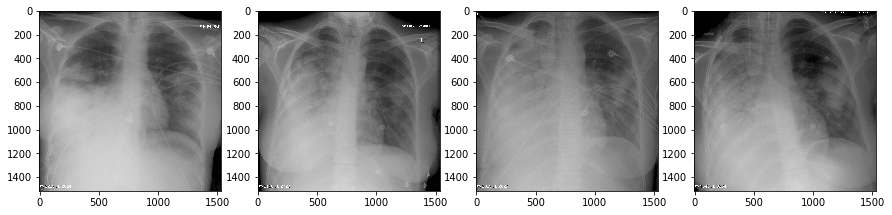

In [39]:
import matplotlib.pyplot as plt
import cv2

p31 = meta_data[meta_data['patientid'] == '31']['filename'].tolist()
fig = plt.figure(figsize=(15, 8))
for i, img_name in enumerate(p31):
    img = cv2.imread(f'covid-chestxray-dataset/images/{img_name}')
    fig.add_subplot(1, 4, i+1)
    plt.imshow(img)
    
plt.show()

### COVID-19 - patient 19, 20, 36, 42, 86

Test dataset으로 사용된 Patient들의 이미지 수 총 16장이고 분포는 다음과 같다.

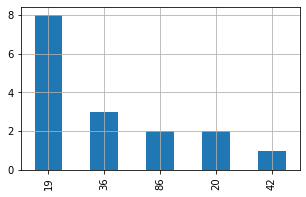

In [51]:
p_covid19 = ['19', '20', '36', '42', '86']
meta_data_covid19 = meta_data[meta_data['patientid'].isin(p_covid19)]
meta_data_covid19['patientid'].value_counts().plot.bar(figsize=(5, 3), grid=True)

### 의문점

COVIDx-CXR dataset에서 Test dataset을 만들 때 사용한 방법 중 의문이 생기는 부분을 정리했다.

* Patient마다 이미지 수가 다른데 Test dataset을 선택할 때, Patient를 기준으로 Random 하게 선택한 부분
  * Patient 중 이미지 수가 많은 경우를 선택하면 Test dataset의 Image 수가 급격히 많아질 수 있다.
  * 아래 그래프처럼 Patient 436을 제외한 나머지 Patient의 Image 수 차이가 심하지 않아서 그런건가?
  * Patient 436을 제외하면 Patient당 Image 수의 범위가 1 ~ 8이다.

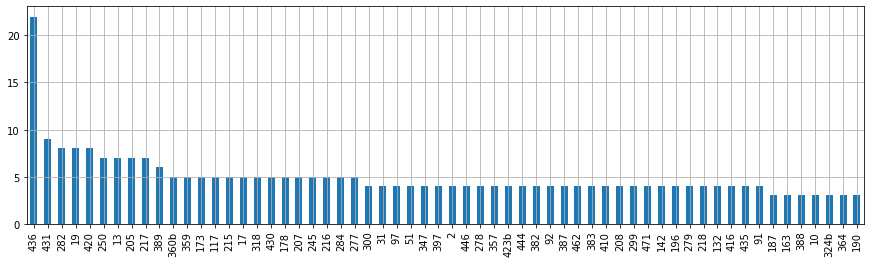

In [76]:
meta_data['patientid'].value_counts()[:60].plot.bar(figsize=(15, 4), grid=True)

## Conclusion

* Patient 436을 제외한 나머지 Patient들을 Random하게 Sampling하여 Validation, Test dataset을 만들면 된다.
* 이 때, 기존에 이미 Test dataset은 Random하게 Sampling 했기 때문에 Validation dataset만 만들면 된다.
* Validation dataset을 만들 때, Pneumonia의 종류에 따라 따로 Random sampling 해야하는지 여부는 애매한 상황이다.
  * 기존에 Train/Test dataset으로 분류할 때는 Pneumonia 종류별로 Random sampling 해야 한다는 언급은 없었다.
  * 따라서 현재는 Pneumonia 종류와 관계없이 Random하게 Sampling 했다.
* Test에서 사용한 이미지 수는 다음과 같다.
  * COVID-19: 전체 584장 중에서 16장을 사용함
  * Pneumonia: 전체 242장 중에서 5장을 사용함